In [1]:
from crawler import *
import pandas as pd

              open    high     low   close    volume
date                                                
2013-12-06  141.51  142.49  136.30  137.36   7909596
2013-12-09  137.00  141.70  134.21  141.60   9061485
2013-12-10  140.05  145.87  139.86  142.19  10748234
2013-12-11  141.88  143.05  139.49  139.65   7137842
2013-12-12  139.70  148.24  138.53  147.47  10767791


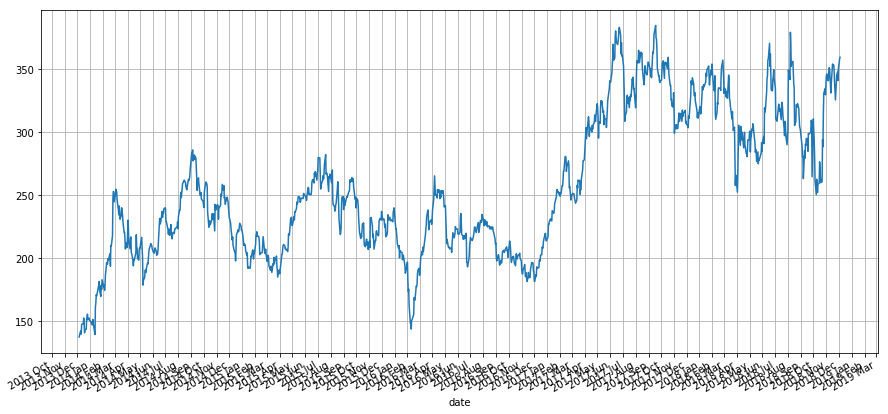

In [2]:
tsla = stockInfo("TSLA",0)
tsla.getFromIEX( tsla.date(2013,1,1), tsla.date(2018, 12, 4))
tsla.addLabel()

In [3]:
tsla.data.head()

,date,open,high,low,close,volume,nextDay
0,2013-12-06,141.51,142.49,136.30,137.36,7909596,141.600
1,2013-12-09,137.00,141.70,134.21,141.60,9061485,142.190
2,2013-12-10,140.05,145.87,139.86,142.19,10748234,139.650
3,2013-12-11,141.88,143.05,139.49,139.65,7137842,147.470
4,2013-12-12,139.70,148.24,138.53,147.47,10767791,147.654


In [5]:
import os
import tensorflow as tf
import numpy as np

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14455600359586708961, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12129425921887211513
 physical_device_desc: "device: XLA_CPU device"]

In [53]:
clone = tsla.data.drop("date", axis=1)
print(clone.head())
col_list = list(clone.columns)
matrix_train = np.matrix(clone)

     open    high     low   close    volume  nextDay
0  141.51  142.49  136.30  137.36   7909596  141.600
1  137.00  141.70  134.21  141.60   9061485  142.190
2  140.05  145.87  139.86  142.19  10748234  139.650
3  141.88  143.05  139.49  139.65   7137842  147.470
4  139.70  148.24  138.53  147.47  10767791  147.654


In [67]:

testNum = 100
matrix_test = matrix_train[len(matrix_train)-testNum:len(matrix_train)-1,:]

In [68]:
matrix_train = matrix_train[0:len(matrix_train)-testNum,:]

In [69]:
len(matrix_train)

1058

In [70]:
len(clone)

1258

In [71]:
train = pd.DataFrame(matrix_train, columns = col_list)
test = pd.DataFrame(matrix_test, columns = col_list)


In [72]:
train.head()

,open,high,low,close,volume,nextDay
0,141.51,142.49,136.30,137.36,7909596.0,141.600
1,137.00,141.70,134.21,141.60,9061485.0,142.190
2,140.05,145.87,139.86,142.19,10748234.0,139.650
3,141.88,143.05,139.49,139.65,7137842.0,147.470
4,139.70,148.24,138.53,147.47,10767791.0,147.654


In [73]:
test.tail()

,open,high,low,close,volume,nextDay
94,304.9545,312.0700,302.00,308.90,8865451.0,318.51
95,311.9900,318.5200,308.00,318.51,7596753.0,322.47
96,324.5600,327.6771,319.20,322.47,9471498.0,318.96
97,315.8000,321.9400,315.07,318.96,4884076.0,316.71
98,321.4300,323.2300,312.77,316.71,5721166.0,318.87


In [74]:

COLUMNS = col_list
FEATURES = list(train.columns)
FEATURES.remove('nextDay')
LABEL = "nextDay"


In [75]:
COLUMNS

['open', 'high', 'low', 'close', 'volume', 'nextDay']

In [76]:
FEATURES

['open', 'high', 'low', 'close', 'volume']

In [77]:
# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
training_prediction_set = train.nextDay
testing_set = test[COLUMNS]
testing_prediction_set = test.nextDay

In [78]:
# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])
#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))